# Analysis

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

## cls_tempbert (Done)

In [2]:
cls_tempbert_results = pickle.load(open("0_Corpus/2_checkpoint_dir/2_corpus_titlecontent_withdocid/cls_tempbert/save_results.pkl", 'rb'))
cls_tempbert_step_results = cls_tempbert_results[0]
step_results_list = []
avg_tr_loss_list = []
for epoch in range(10):
    for step in range(0,420000, 10000):
        k = f'{epoch}-{step}'
        step_results_list.append(cls_tempbert_step_results[k][0])
        avg_tr_loss_list.append(cls_tempbert_step_results[k][-1])
mv_step_results_list = moving_average(step_results_list)

In [3]:
cls_tempbert_results[1]

[5.718691434776797,
 4.919687121855259,
 4.675004125150969,
 4.496524185280012,
 4.342276265543499,
 4.20041342152735,
 4.0701138501779965,
 3.94851158699855,
 3.8347905596074288,
 3.73004159169345]

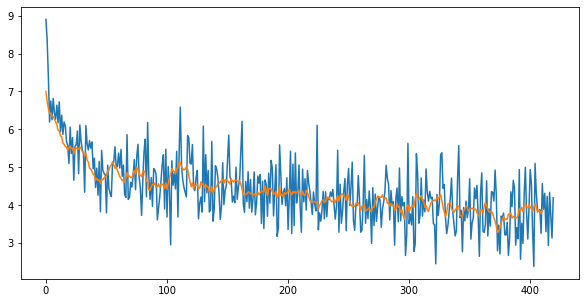

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(step_results_list)
ax.plot(mv_step_results_list)

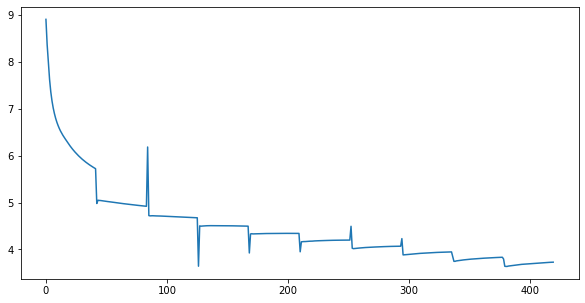

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(avg_tr_loss_list)

In [6]:
mlm_results_list = []
temppred_results_list = []
for epoch in range(10):
    for step in range(0,420000, 10000):
        k = f'{epoch}-{step}'
        mlm_results_list.append(cls_tempbert_step_results[k][1])
        temppred_results_list.append(cls_tempbert_step_results[k][2])
        
mv_mlm_results_list = moving_average(mlm_results_list)
mv_temppred_results_list = moving_average(temppred_results_list)

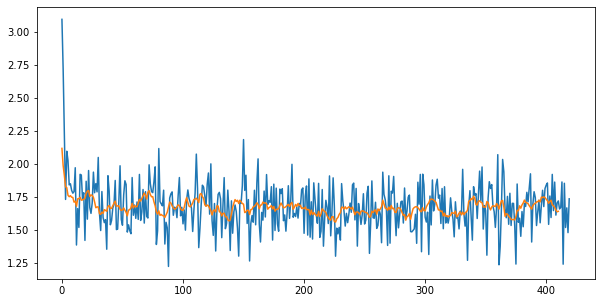

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(mlm_results_list)
ax.plot(mv_mlm_results_list)

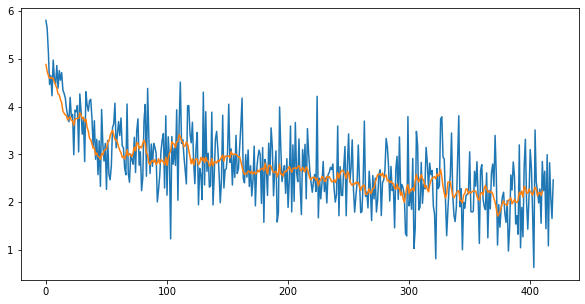

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(temppred_results_list)
ax.plot(mv_temppred_results_list)

## cls_bert

In [9]:
cls_bert_results = pickle.load(open("0_Corpus/2_checkpoint_dir/2_corpus_titlecontent_withdocid/cls_bert/save_results.pkl", 'rb'))
cls_bert_step_results = cls_bert_results[0]
step_results_list = []
avg_tr_loss_list = []
for epoch in range(2):
    for step in range(0,630000, 10000):
        k = f'{epoch}-{step}'
        step_results_list.append(cls_bert_step_results[k][0])
        avg_tr_loss_list.append(cls_bert_step_results[k][-1])
mv_step_results_list = moving_average(step_results_list)

In [10]:
cls_bert_results[1]

[1.715483250910377, 1.5366345403929444]

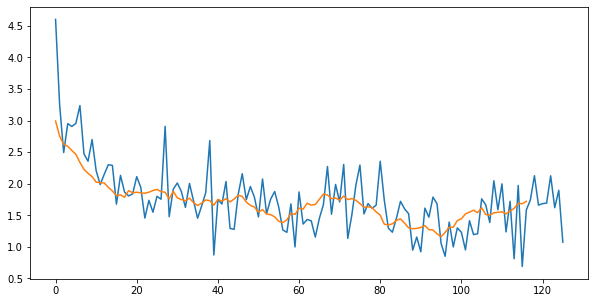

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(step_results_list)
ax.plot(mv_step_results_list)

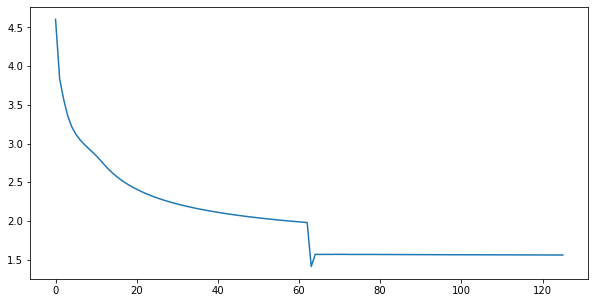

In [12]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(avg_tr_loss_list)

## no-nsp_bert

In [13]:
no_nsp_bert_results = pickle.load(open("0_Corpus/2_checkpoint_dir/2_corpus_titlecontent_withdocid/no-nsp_bert/save_results.pkl", 'rb'))
no_nsp_bert_step_results = no_nsp_bert_results[0]
step_results_list = []
avg_tr_loss_list = []
for epoch in range(2):
    for step in range(0,630000, 10000):
        k = f'{epoch}-{step}'
        step_results_list.append(no_nsp_bert_step_results[k][0])
        avg_tr_loss_list.append(no_nsp_bert_step_results[k][-1])
mv_step_results_list = moving_average(step_results_list)

In [14]:
no_nsp_bert_results[1]

[1.6693914860514156, 1.5035835047832247]

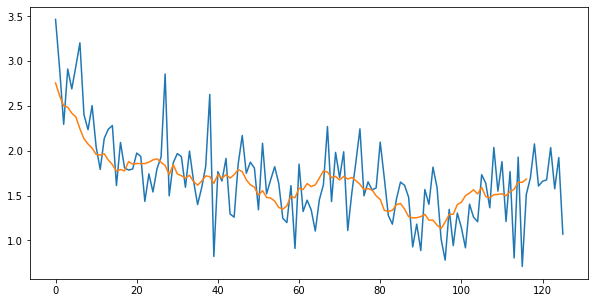

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(step_results_list)
ax.plot(mv_step_results_list)

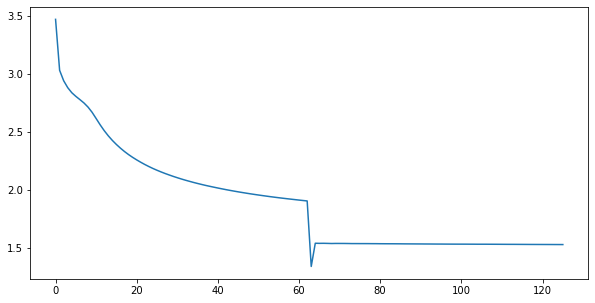

In [16]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(avg_tr_loss_list)

# Graph

In [1]:
import matplotlib.pyplot as plt

In [2]:
#10 epochs ("checkpoint0-77643") Year
cls_tempbert_valacc_epoch_list = [0.234375, 0.24821428571428572, 0.26339285714285715, 0.26651785714285714, 0.26919642857142856, 
                                  0.26607142857142857, 0.2598214285714286, 0.2714285714285714, 0.2642857142857143, 0.2727678571428571]
cls_bert_valacc_epoch_list = [0.12321428571428572, 0.16875, 0.18392857142857144, 0.21116071428571428, 0.20625,
                              0.21205357142857142, 0.20848214285714287, 0.2174107142857143, 0.21294642857142856, 0.21339285714285713]
nonsp_bert_valacc_epoch_list = [0.13035714285714287, 0.15580357142857143, 0.17946428571428572, 0.2044642857142857, 0.21160714285714285, 
                                0.21071428571428572, 0.2125, 0.2200892857142857, 0.2080357142857143, 0.21116071428571428]
orig_bert_valacc_epoch_list = [0.13705357142857144, 0.15223214285714284, 0.18392857142857144, 0.2, 0.1924107142857143,
                               0.21071428571428572, 0.221875, 0.22633928571428572, 0.21294642857142856, 0.2174107142857143]

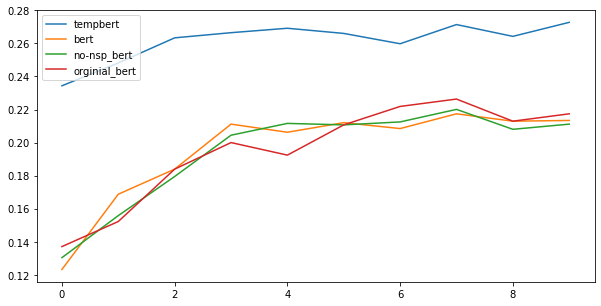

In [3]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(cls_tempbert_valacc_epoch_list, label="tempbert")
ax.plot(cls_bert_valacc_epoch_list, label="bert")
ax.plot(nonsp_bert_valacc_epoch_list, label="no-nsp_bert")
ax.plot(orig_bert_valacc_epoch_list, label="orginial_bert")
plt.legend(loc="upper left")
plt.show()

In [4]:
#10 epochs ("checkpoint0-77643") Month
cls_tempbert_valacc_epoch_list = [0.026339285714285714, 0.054017857142857145, 0.05803571428571429, 0.07098214285714285, 0.06785714285714285, 
                                  0.07723214285714286, 0.08035714285714286, 0.07857142857142857, 0.08482142857142858, 0.08705357142857142]
cls_bert_valacc_epoch_list = [0.009821428571428571, 0.017857142857142856, 0.02544642857142857, 0.03080357142857143, 0.03214285714285714, 
                              0.038392857142857145, 0.044196428571428574, 0.04285714285714286, 0.049553571428571426, 0.049553571428571426]

orig_bert_valacc_epoch_list = [0.015625, 0.020982142857142855, 0.03169642857142857, 0.033482142857142856, 0.03482142857142857, 
                               0.04241071428571429, 0.04375, 0.044196428571428574, 0.048660714285714286, 0.048214285714285716]

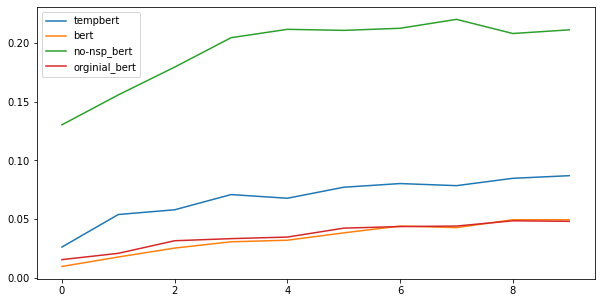

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(cls_tempbert_valacc_epoch_list, label="tempbert")
ax.plot(cls_bert_valacc_epoch_list, label="bert")
ax.plot(nonsp_bert_valacc_epoch_list, label="no-nsp_bert")
ax.plot(orig_bert_valacc_epoch_list, label="orginial_bert")
plt.legend(loc="upper left")
plt.show()